In [1]:
%matplotlib inline

In [65]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import cProfile

In [12]:
from sklearn import datasets
n_samples = 1200
blobs = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=4)
df = pd.DataFrame(blobs[0], columns=['x', 'y'])

In [97]:
def visualize(df, labels):
    y_df = df.copy()
    y_df['cluster'] = [f'l{i}' for i in labels]
    return sns.scatterplot(data=y_df, x='x', y='y', hue='cluster')

In [104]:
import src.clustering.pam as pam
import src.clustering.kmeans as kmeans
import src.distance

import importlib

importlib.reload(src.clustering.kmeans)
importlib.reload(src.clustering.pam)

<module 'src.clustering.pam' from 'C:\\Users\\j\\PycharmProjects\\lnu_ht19_4ME310_assignment2\\src\\clustering\\pam.py'>

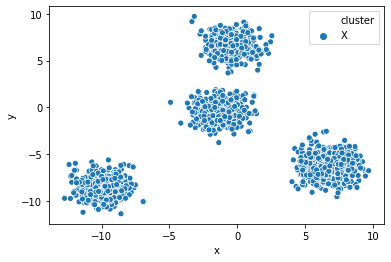

In [6]:
visualize(df, ['X' for i in range(len(df))])

         1685 function calls (1681 primitive calls) in 0.007 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.007    0.007 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 __init__.py:497(cast)
        2    0.000    0.000    0.000    0.000 _internal.py:260(__init__)
        2    0.000    0.000    0.000    0.000 _internal.py:263(__array_interface__)
        2    0.000    0.000    0.000    0.000 _internal.py:275(_get_void_ptr)
        2    0.000    0.000    0.000    0.000 _internal.py:292(__init__)
        2    0.000    0.000    0.000    0.000 _internal.py:341(data)
        8    0.000    0.000    0.000    0.000 _methods.py:34(_sum)
       72    0.000    0.000    0.000    0.000 _methods.py:45(_all)
       32    0.000    0.000    0.000    0.000 _methods.py:48(_count_reduce_items)
       32    0.000    0.000    0.001    0.000 _methods.py:58(_mean)
        8    0.000    0.000    0

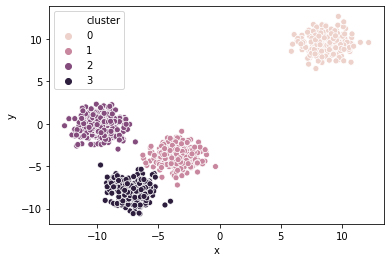

In [74]:
kmk_means = kmeans.KMeans(n_clusters=4, distance=src.distance.euclidean_distance, verbose=False)
cProfile.run('kmk_means.fit(df)')
visualize(df, kmk_means.predict(df))

         1555055 function calls (1555051 primitive calls) in 4.954 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    4.954    4.954 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 __init__.py:497(cast)
        2    0.000    0.000    0.000    0.000 _internal.py:260(__init__)
        2    0.000    0.000    0.000    0.000 _internal.py:263(__array_interface__)
        2    0.000    0.000    0.000    0.000 _internal.py:275(_get_void_ptr)
        2    0.000    0.000    0.000    0.000 _internal.py:292(__init__)
        2    0.000    0.000    0.000    0.000 _internal.py:341(data)
    23921    0.007    0.000    0.100    0.000 _methods.py:34(_sum)
    47852    0.010    0.000    0.085    0.000 _methods.py:45(_all)
        2    0.000    0.000    0.000    0.000 base.py:723(__len__)
        1    0.000    0.000    0.000    0.000 blocks.py:217(get_values)
        4    0.000    0.000    0.000 

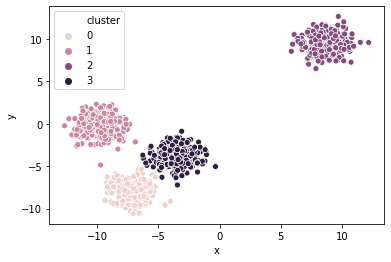

In [76]:
import src.numpy_util
importlib.reload(src.numpy_util)
importlib.reload(src.clustering.pam)
apam = pam.PAM(n_clusters=4, distance=src.distance.manhattan_distance, verbose=False)
cProfile.run('apam.fit(df)')
plt = visualize(df, apam.predict(df))
plt.get_figure().savefig('pam3.png')
plt

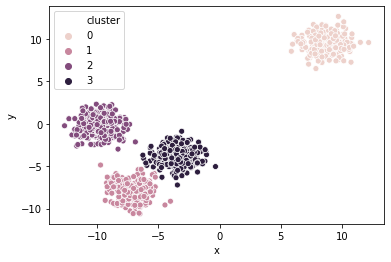

In [61]:
from sklearn.cluster import KMeans
sc_means = KMeans(n_clusters=4, init='random', n_init=1, algorithm='full')
sc_means.fit(df)
plt = visualize(df, sc_means.labels_)
plt.get_figure().savefig('k_means3.png')
plt